In [62]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt; plt.rcdefaults()
import math
import csv
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler


In [63]:
#dataset constructed from the aggregate of all avg net stat files
df=pd.read_csv('/home/vikmachine/Downloads/ALL_ABNORMAL_DS_15.csv')

In [64]:
#generate a bipartite graph 
def construct_graph(G):
# set nodes for left side of bipartite graph
    G = nx.Graph()
    G.add_node('Average Degree', name='Average Degree', bipartite = 0)
    G.nodes['Average Degree']['color'] = 'y'

    G.add_node('Degree Centrality', name='Degree Centrality',bipartite = 0)
    G.nodes['Degree Centrality']['color'] = 'y'

    G.add_node('Clustering coefficient',name='Clustering Coefficient', bipartite = 0)
    G.nodes['Clustering coefficient']['color'] = 'y'

    G.add_node('Katz Centrality',name='Katz Centrality',  bipartite = 0)
    G.nodes['Katz Centrality']['color'] = 'y'

    G.add_node('Between Centrality',name='Between Centrality', bipartite = 0)
    G.nodes['Between Centrality']['color'] = 'y'

    G.add_node('Closeness Centrality',name='Closeness Centrality',bipartite = 0)
    G.nodes['Closeness Centrality']['color'] = 'y'
    return G

G = nx.Graph()
G=construct_graph(G)

In [65]:
df.groupby('Y').Y.count()

Y
SZ    352
a     469
au      8
c     468
e       8
i      11
Name: Y, dtype: int64

In [66]:
#creating a list to store network attributes
AD = DC = CL = KZ = BT = CS =  []
df=pd.read_csv('/home/vikmachine/Desktop/means.csv')
AD = df['Average Degree'].tolist()
DC = df['Degree Centrality'].tolist()
CL = df['Clustering coefficient'].tolist()
KZ = df['Katz Centrality'].tolist()
BT = df['Between Centrality'].tolist()
CS = df['Closeness Centrality'].tolist()
for index, row in df.iterrows():
    AD.append(row['Average Degree'])
    DC.append(row['Degree Centrality'])
    CL.append(row['Clustering coefficient'])
    KZ.append(row['Katz Centrality'])
    BT.append(row['Between Centrality'])
    CS.append(row['Closeness Centrality'])
df=df[['Average Degree','Average shortest path','Clustering coefficient','Katz Centrality','Between Centrality','Degree Centrality','Closeness Centrality','Y']]

In [67]:
G.add_nodes_from(['autism','alcoholism','control','schizophrenia','insomnia','epilepsy'], bipartite = 1) 
G.nodes['autism']['name'] = 'autism'
G.nodes['alcoholism']['name'] = 'alcoholism'
G.nodes['control']['name'] = 'control'
G.nodes['schizophrenia']['name'] = 'schizophrenia'
G.nodes['insomnia']['name'] = 'insomnia'
G.nodes['epilepsy']['name'] = 'epilepsy'

In [68]:
#stats file generated from average of all net stats for each subject
d2=pd.read_csv('/home/vikmachine/Desktop/std.csv')

person = 6
print(AD)
print(G.nodes())
for i in  G.nodes():
    if G.node[i]['bipartite'] == 0: #all nodes from bipartite=0
        counter=0
        
        for j in  G.nodes():
            if G.node[j]['bipartite'] == 1: #all nodes from bipartite=0
                G.add_edge(i, j,color='grey',weight=1)
      
                #following statements identify nodes based on name then looks into mean 
                #file for the name and obtains the required network measure, similarly the search 
                #for the name is done in the std and extracts the same network measure
                #the condition is then true if the value lies between 'mean - standard deviation' and 'mean + standard deviation'
                
                if G.node[i]['name']=='Average Degree' and AD[person] >= df.loc[df['Y'] == G.node[j]['name'], 'Average Degree'].iloc[0] - d2.loc[d2['Y'] == G.node[j]['name'], 'Average Degree'].iloc[0]   and   AD[person] <= df.loc[df['Y'] == G.node[j]['name'], 'Average Degree'].iloc[0] + d2.loc[d2['Y'] == G.node[j]['name'], 'Average Degree'].iloc[0]:
                    G.add_edge(i,j,color='r',weight=2)
                else:
                    #G.add_edge(i, j,color='grey')
                    counter=0
  
                if G.node[i]['name']=='Katz Centrality' and KZ[person] >= df.loc[df['Y'] == G.node[j]['name'], 'Katz Centrality'].iloc[0] - d2.loc[d2['Y'] == G.node[j]['name'], 'Katz Centrality'].iloc[0]   and  KZ[person] <= df.loc[df['Y'] == G.node[j]['name'], 'Katz Centrality'].iloc[0] + d2.loc[d2['Y'] == G.node[j]['name'], 'Katz Centrality'].iloc[0]:
                    G.add_edge(i,j,color='r', weight =2)
                else:
                    #G.add_edge(i, j,color='grey')
                    counter=0
                
                if G.node[i]['name']=='Clustering coefficient' and CL[person] >= df.loc[df['Y'] == G.node[j]['name'], 'Clustering coefficient'].iloc[0] - d2.loc[d2['Y'] == G.node[j]['name'], 'Clustering coefficient'].iloc[0]   and   CL[person] <= df.loc[df['Y'] == G.node[j]['name'], 'Clustering coefficient'].iloc[0] + d2.loc[d2['Y'] == G.node[j]['name'], 'Clustering coefficient'].iloc[0]:
                    G.add_edge(i, j, color='r', weight=2)
                else:
                    #G.add_edge(i, j,color='grey')
                    counter=0
                    
                if G.node[i]['name']=='Between Centrality' and BT[person] >= df.loc[df['Y'] == G.node[j]['name'], 'Between Centrality'].iloc[0] - d2.loc[d2['Y'] == G.node[j]['name'], 'Between Centrality'].iloc[0]  and    BT[person] <= df.loc[df['Y'] == G.node[j]['name'], 'Between Centrality'].iloc[0] + d2.loc[d2['Y'] == G.node[j]['name'], 'Between Centrality'].iloc[0]:
                    G.add_edge(i, j, color='r', weight=2)
                else:
                    #G.add_edge(i, j,color='grey')
                    counter=0
                
                if G.node[i]['name']=='Degree Centrality' and DC[person] >= df.loc[df['Y'] == G.node[j]['name'], 'Degree Centrality'].iloc[0] - d2.loc[d2['Y'] == G.node[j]['name'], 'Degree Centrality'].iloc[0]  and  DC[person] <= df.loc[df['Y'] == G.node[j]['name'], 'Degree Centrality'].iloc[0] + d2.loc[d2['Y'] == G.node[j]['name'], 'Degree Centrality'].iloc[0]:
                    G.add_edge(i, j, color='r', weight=2)
                else:
                    #G.add_edge(i, j,color='grey')
                    counter=0
                
                if G.node[i]['name']=='Closeness Centrality' and CS[person] >= df.loc[df['Y'] == G.node[j]['name'], 'Closeness Centrality'].iloc[0] - d2.loc[d2['Y'] == G.node[j]['name'], 'Closeness Centrality'].iloc[0]  and   CS[person] <= df.loc[df['Y'] == G.node[j]['name'], 'Closeness Centrality'].iloc[0] + d2.loc[d2['Y'] == G.node[j]['name'], 'Closeness Centrality'].iloc[0]:
                    G.add_edge(i, j, color='r', weight =2)
                else:
                    #G.add_edge(i, j,color='grey')
                    counter=0
                counter+=1
                

[38.244476, 30.516173, 31.31018, 25.88407, 7.264987, 31.416227000000003, 38.244476, 30.516173, 31.31018, 25.88407, 7.264987, 31.416227000000003]
['Average Degree', 'Degree Centrality', 'Clustering coefficient', 'Katz Centrality', 'Between Centrality', 'Closeness Centrality', 'autism', 'alcoholism', 'control', 'schizophrenia', 'insomnia', 'epilepsy']


/home/vikmachine/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/vikmachine/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \


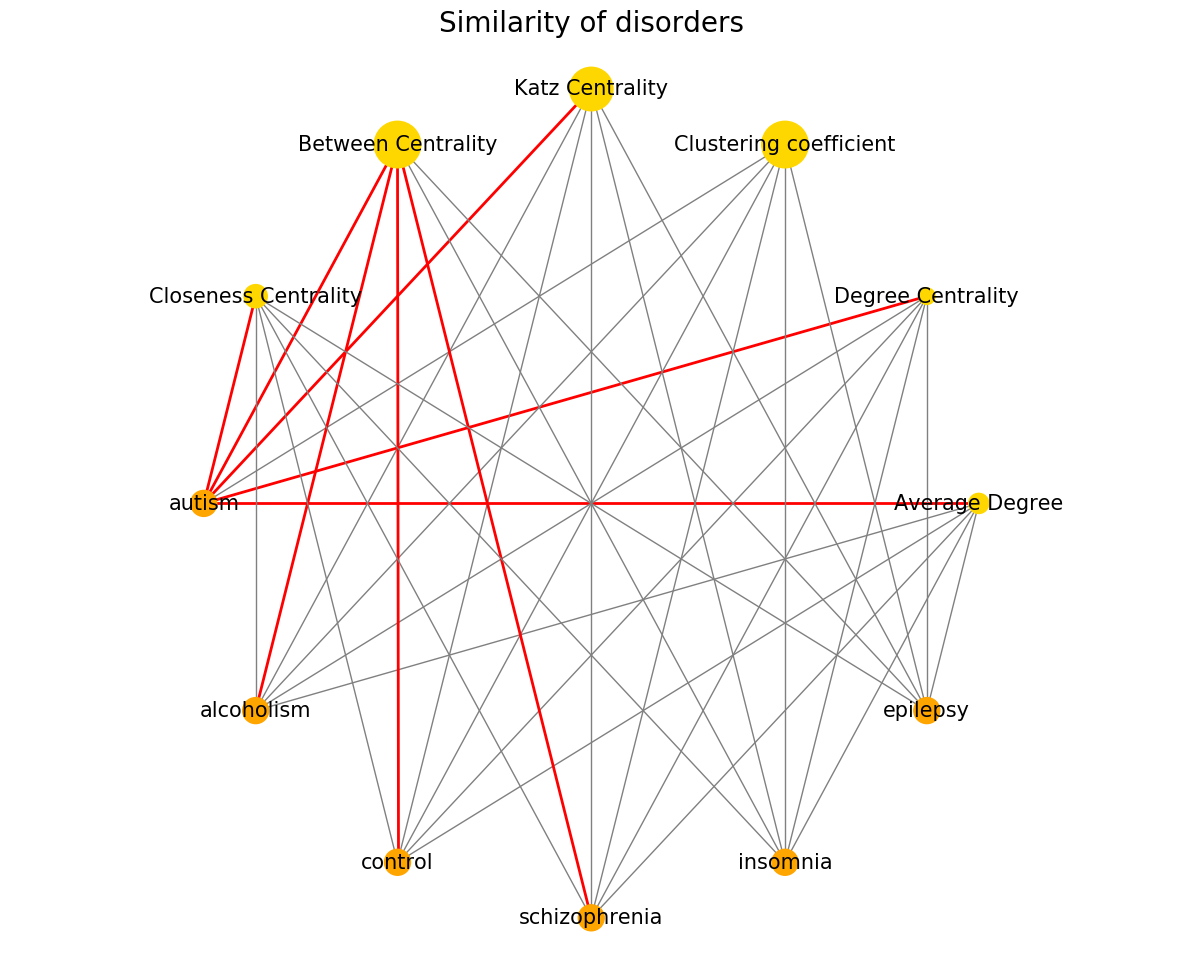

In [69]:
G_first_partition_nodes = []

for i in  G.nodes():
    if G.node[i]['bipartite'] == 0:
        G_first_partition_nodes.append(i)

x=70
size = [3*x,2*x,16*x,14*x,16*x,4*x,350,350,350,350,350,350]
plt.figure(3,figsize=(15,12))
plt.title("Similarity of disorders", fontsize=20)
color=['gold','gold','gold','gold','gold','gold','orange','orange','orange','orange','orange','orange']



pos = nx.circular_layout(G)
edges = G.edges()
#assign edge colors
colors = [G[u][v]['color'] for u,v in edges]
weights = [G[u][v]['weight'] for u,v in edges]
#nx.draw_networkx(G, pos = nx.drawing.layout.bipartite_layout(G, G_first_partition_nodes),font_size=20, node_size=size, node_color = color, edge_color=colors, width=weights) # Or whatever other display options you like
nx.draw(G, pos, with_labels=True, node_size=size, node_color = color, edge_color=colors, width=weights, font_size=15) 

#plot using xlimits
x_values, y_values = zip(*pos.values())
x_max = max(x_values)
x_min = min(x_values)
x_margin = (x_max - x_min) * 0.25
plt.xlim(x_min - x_margin, x_max + x_margin)

plt.savefig("group1.png")
plt.show()

In [70]:
G1= nx.Graph()
G1.add_node('Ave Degree', name='Ave Degree', bipartite = 0)
G1.nodes['Ave Degree']['color'] = 'y'

G1.add_node('Degree Cent', name='Degree Cent', bipartite = 0)
G1.nodes['Degree Cent']['color'] = 'y'

G1.add_node('Clustering',name='Clustering', bipartite = 0)
G1.nodes['Clustering']['color'] = 'y'

G1.add_node('Katz',name='Katz', bipartite = 0)
G1.nodes['Katz']['color'] = 'y'

G1.add_node('Between',name='Between', bipartite = 0)
G1.nodes['Between']['color'] = 'y'

G1.add_node('Closeness',name='Closeness', bipartite = 0)
G1.nodes['Closeness']['color'] = 'y'


In [71]:
AD1 = DC1 = CL1 = KZ1 = BT1 = CS1 =  [] 
df=pd.read_csv('/home/vikmachine/epilepsy_rawData/Ep_Stat.csv')
AD1 = df['Ave Degree'].tolist()
DC1 = df['Degree Cent'].tolist()
CL1 = df['Clustering'].tolist()
KZ1 = df['Katz'].tolist()
BT1 = df['Between'].tolist()
CS1 = df['Closeness'].tolist()
for index, row in df.iterrows():
    AD1.append(row['Ave Degree'])
    DC1.append(row['Degree Cent'])
    CL1.append(row['Clustering'])
    KZ1.append(row['Katz'])
    BT1.append(row['Between'])
    CS1.append(row['Closeness'])
    #print(row['Ave Degree'], row['Degree Centrality'],row['Clustering'], row['Katz'], row['Between'], row['Closeness'], "\n" )
    

In [72]:
df.describe()

,Unnamed: 0,Ave Degree,Degree Cent,Clustering,Katz,Between,Closeness,Y
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,8.000000,33.764498,0.453604,0.642706,0.007459,0.008111,0.631474,0.500000
std,5.215362,1.095701,0.015115,0.017101,0.006220,0.000356,0.008396,0.516398
min,0.000000,31.450607,0.430270,0.608773,0.000283,0.007607,0.617783,0.000000
25%,3.750000,33.144525,0.439279,0.632306,0.004390,0.007819,0.624133,0.000000
50%,8.000000,33.733646,0.457477,0.636704,0.007066,0.007995,0.631361,0.500000
75%,12.250000,34.476036,0.462613,0.656252,0.008133,0.008357,0.639494,1.000000
max,16.000000,35.783457,0.481441,0.674350,0.024679,0.008649,0.644670,1.000000


In [75]:
G1.add_nodes_from(['ep1', 'ep2', 'ep3', 'ep4', 'ep5', 'ep6', 'ep7', 'ep8', 'non_ep1', 'non_ep2', 'non_ep3', 'non_ep4', 'non_ep5', 'non_ep6', 'non_ep7', 'non_ep8'], bipartite = 1) 
G1.nodes['non_ep1']['name'] = 'non_ep1'
G1.nodes['non_ep2']['name'] = 'non_ep2'
G1.nodes['non_ep3']['name'] = 'non_ep3'
G1.nodes['non_ep4']['name'] = 'non_ep4'
G1.nodes['non_ep5']['name'] = 'non_ep5'
G1.nodes['non_ep6']['name'] = 'non_ep6'
G1.nodes['non_ep7']['name'] = 'non_ep7'
G1.nodes['non_ep8']['name'] = 'non_ep8'
G1.nodes['ep1']['name'] = 'ep1'
G1.nodes['ep2']['name'] = 'ep2'
G1.nodes['ep3']['name'] = 'ep3'
G1.nodes['ep4']['name'] = 'ep4'
G1.nodes['ep5']['name'] = 'ep5'
G1.nodes['ep6']['name'] = 'ep6'
G1.nodes['ep7']['name'] = 'ep7'
G1.nodes['ep8']['name'] = 'ep8'

#std values obtained from df.describe()
std = [1.095701, 0.015115, 0.642706, 0.006220, 0.000356, 0.008396]
person = 7
print(AD1)
for i in  G1.nodes():
    if G1.node[i]['bipartite'] == 0:
        counter=0
            
        for j in  G1.nodes():
            if G1.node[j]['bipartite'] == 1:
        
                    
                if G1.node[i]['name']=='Ave Degree' and AD1[person] >= float((df.loc[df['patient'] == G1.node[j]['name'], 'Ave Degree'].iloc[0]) - std[0]/3)   and   AD1[person] <= float((df.loc[df['patient'] == G1.node[j]['name'], 'Ave Degree'].iloc[0]) + std[0]/3):
                    G1.add_edge(i, j)
                    #print (i)
                    
                if G1.node[i]['name']=='Katz' and KZ1[person] >= float((df.loc[df['patient'] == G1.node[j]['name'], 'Katz'].iloc[0]) - std[1]/3)   and  KZ1[person] <= float((df.loc[df['patient'] == G1.node[j]['name'], 'Katz'].iloc[0]) + std[1]/3):
                    G1.add_edge(i, j)
                    #print (i)
                
                if G1.node[i]['name']=='Clustering' and CL1[person] >= float((df.loc[df['patient'] == G1.node[j]['name'], 'Clustering'].iloc[0]) - std[2]/3)   and   CL1[person] <= float((df.loc[df['patient'] == G1.node[j]['name'], 'Clustering'].iloc[0]) + std[2]/3):
                    G1.add_edge(i, j)
                    #print (i)
                    
                if G1.node[i]['name']=='Between' and BT1[person] >= float((df.loc[df['patient'] == G1.node[j]['name'], 'Between'].iloc[0]) - std[3]/3)   and    BT1[person] <= float((df.loc[df['patient'] == G1.node[j]['name'], 'Between'].iloc[0]) + std[3]/3):
                    G1.add_edge(i, j)
                    #print (i)
                
                if G1.node[i]['name']=='Degree Cent' and DC1[person] >= float((df.loc[df['patient'] == G1.node[j]['name'], 'Degree Cent'].iloc[0]) - std[4]/3)  and  DC1[person] <= float((df.loc[df['patient'] == G1.node[j]['name'], 'Degree Cent'].iloc[0]) + std[4]/3):
                    G1.add_edge(i, j)
                    #print (i)
                
                if G1.node[i]['name']=='Closeness' and CS1[person] >= float((df.loc[df['patient'] == G1.node[j]['name'], 'Closeness'].iloc[0]) - std[5]/3)  and   CS1[person] <= float((df.loc[df['patient'] == G1.node[j]['name'], 'Closeness'].iloc[0]) + std[5]/3):
                    G1.add_edge(i, j)
                    #print (i)
                counter+=1

            

[33.4650879964852, 33.7873562680544, 33.6799356348385, 34.937107881656296, 33.664030284679896, 32.7920640608953, 32.2723356927832, 31.450607491688, 34.7399171957071, 34.1139615484045, 33.8735815772517, 35.0383325941315, 34.3880752348011, 35.78345660157029, 33.0801325075163, 33.1659894837446, 33.4650879964852, 33.7873562680544, 33.6799356348385, 34.937107881656296, 33.664030284679896, 32.7920640608953, 32.2723356927832, 31.450607491688, 34.7399171957071, 34.1139615484045, 33.8735815772517, 35.0383325941315, 34.3880752348011, 35.78345660157029, 33.0801325075163, 33.1659894837446]


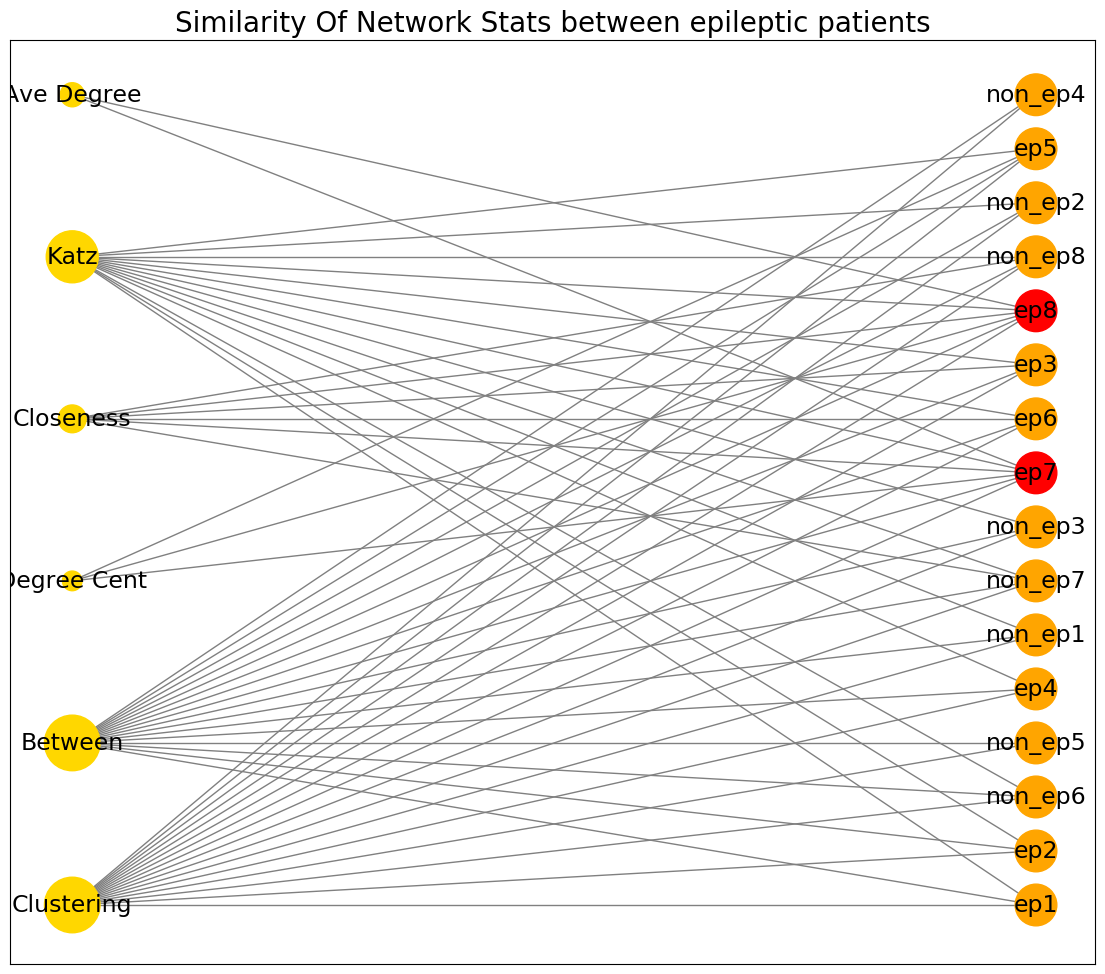

In [92]:
G1_first_partition_nodes = []

for i in  G1.nodes():
    if G1.node[i]['bipartite'] == 0:
        G1_first_partition_nodes.append(i)

x=100
y=2
size = [3*x,2*x,16*x,14*x,16*x,4*x,450*y,450*y,450*y,450*y,450*y,450*y,450*y,450*y,450*y,450*y,450*y,450*y,450*y,450*y,450*y,450*y]
plt.figure(3,figsize=(14,12))
plt.title("Similarity Of Network Stats between epileptic patients", fontsize=20)
color=['gold','gold','gold','gold','gold','gold','orange','orange','orange','orange','orange','orange','red','red','orange','orange','orange','orange','orange','orange','orange','orange']
nx.draw_networkx(G1, pos = nx.drawing.layout.bipartite_layout(G1, G1_first_partition_nodes),font_size=17, node_size=size, node_color = color,edge_color='grey' ) # Or whatever other display options you like
plt.savefig("similarity", dpi=100)